In [2]:
import pandas as pd
from utility import *

import matplotlib.pyplot as plt

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

from prophet import Prophet

import numpy as np
import seaborn as sns

### Read all Data

In [3]:
ticker_list = ['META','AAPL','AMZN','NFLX', 'GOOG', 'GOOGL']

#### Read data from csv and store it in dataframe with timestamp as index and sort index.

In [4]:
meta_all_df = pd.read_csv("../Datasets/daily_META.csv")
meta_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
meta_all_df.set_index('timestamp', inplace=True)
meta_all_df.index = pd.to_datetime(meta_all_df.index)
meta_all_df.sort_index(inplace=True)
#display(meta_all_df)
display(meta_all_df.info())

aapl_all_df = pd.read_csv("../Datasets/daily_AAPL.csv")
aapl_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
aapl_all_df.set_index('timestamp', inplace=True)
aapl_all_df.index = pd.to_datetime(aapl_all_df.index)
aapl_all_df.sort_index(inplace=True)
#display(aapl_all_df)
display(aapl_all_df.info())

amzn_all_df = pd.read_csv("../Datasets/daily_AMZN.csv")
amzn_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
amzn_all_df.set_index('timestamp', inplace=True)
amzn_all_df.index = pd.to_datetime(amzn_all_df.index)
amzn_all_df.sort_index(inplace=True)
#display(amzn_all_df)
display(amzn_all_df.info())

nflx_all_df = pd.read_csv("../Datasets/daily_NFLX.csv")
nflx_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
nflx_all_df.set_index('timestamp', inplace=True)
nflx_all_df.index = pd.to_datetime(nflx_all_df.index)
nflx_all_df.sort_index(inplace=True)
#display(nflx_all_df)
display(nflx_all_df.info())

goog_all_df = pd.read_csv("../Datasets/daily_GOOG.csv")
goog_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
goog_all_df.set_index('timestamp', inplace=True)
goog_all_df.index = pd.to_datetime(goog_all_df.index)
goog_all_df.sort_index(inplace=True)
#display(goog_all_df)
display(goog_all_df.info())

googl_all_df = pd.read_csv("../Datasets/daily_GOOGL.csv")
googl_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
googl_all_df.set_index('timestamp', inplace=True)
googl_all_df.index = pd.to_datetime(googl_all_df.index)
googl_all_df.sort_index(inplace=True)
#display(googl_all_df)
display(googl_all_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2925 entries, 2012-05-18 to 2024-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2925 non-null   float64
 1   high    2925 non-null   float64
 2   low     2925 non-null   float64
 3   close   2925 non-null   float64
 4   volume  2925 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 137.1 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 1999-11-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6080 non-null   float64
 1   high    6080 non-null   float64
 2   low     6080 non-null   float64
 3   close   6080 non-null   float64
 4   volume  6080 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 285.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 1999-11-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6080 non-null   float64
 1   high    6080 non-null   float64
 2   low     6080 non-null   float64
 3   close   6080 non-null   float64
 4   volume  6080 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 285.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5439 entries, 2002-05-23 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5439 non-null   float64
 1   high    5439 non-null   float64
 2   low     5439 non-null   float64
 3   close   5439 non-null   float64
 4   volume  5439 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 255.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2014-03-27 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2458 non-null   float64
 1   high    2458 non-null   float64
 2   low     2458 non-null   float64
 3   close   2458 non-null   float64
 4   volume  2458 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.2 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4875 entries, 2004-08-19 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4875 non-null   float64
 1   high    4875 non-null   float64
 2   low     4875 non-null   float64
 3   close   4875 non-null   float64
 4   volume  4875 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 228.5 KB


None

After reviewing the individual data, we can see each stock has different volume of data so to make it consistent lets consider last 10 years, with google (goog) still lagging around 3 months of data but we will have all stocks with 10yrs data.

In [120]:
# function to filter data by date index
def filter_data_by_date(df, fromDt, toDt=None):
    '''
        Function to filter data from a dataframe with datetime as index

        Args: 
            df - Dataframe to filter
            fromtDt: starting date which can be any of datetime index format
            toDt: ending date which can be any of datetime index format
        
        Exception: 
            Will catch and display error if not able to filter data. 
            Most likely if index is not of type datetime, keyeror will 
            be raised
    '''
    try:
        if not toDt:
            return df.loc[fromDt].copy()
        return df.loc[fromDt:toDt].copy()
    except Exception as ex:
        print(f'Not able to filter data. {ex.__class__} - {ex}')

#### filter data from 2014 to 2023 to make it consistent

In [122]:
meta_df = filter_data_by_date(meta_all_df, '2014', '2023')

aapl_df = filter_data_by_date(aapl_all_df, '2014', '2023')

amzn_df = filter_data_by_date(amzn_all_df, '2014', '2023')

nflx_df = filter_data_by_date(nflx_all_df, '2014', '2023')

goog_df = filter_data_by_date(goog_all_df, '2014', '2023')

googl_df = filter_data_by_date(googl_all_df, '2014', '2023')

### Plot all data

Let us plot all stocks as timeseries charts, so we can seee how the prices have been trending.

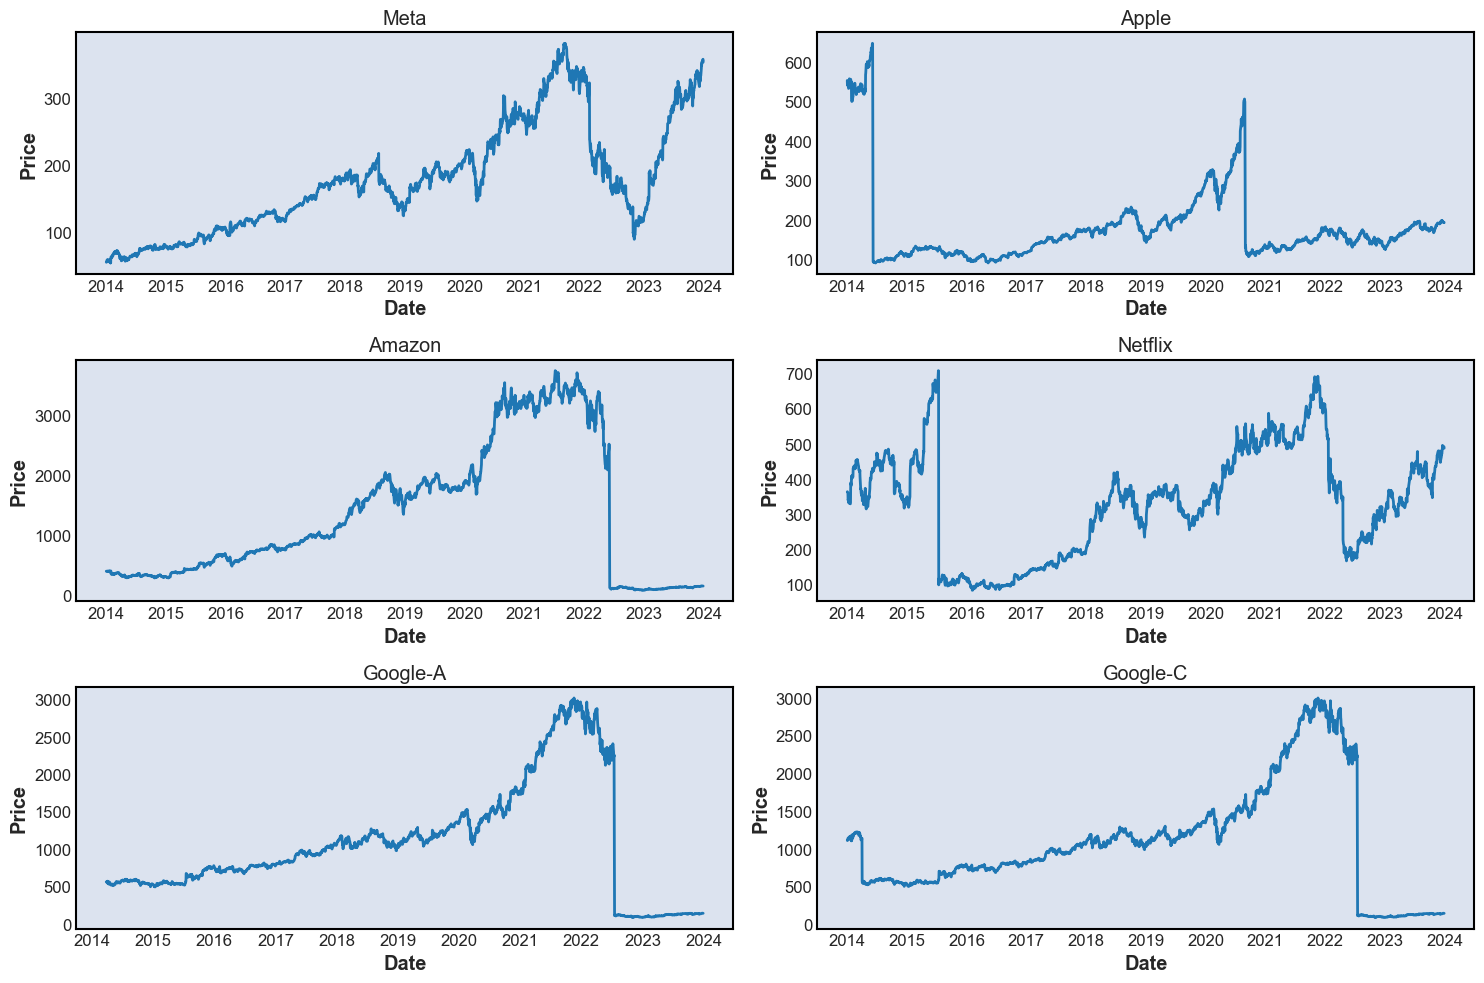

In [136]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google-A', 'Google-C']
data_frames = [meta_df, aapl_df, amzn_df, nflx_df, goog_df, googl_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        ax.plot(data_frames[i][['close']] )
        ax.set_title(stocks[i])
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.grid(visible=False)
plt.tight_layout()
plt.show()

We can see that there are many sudden drops at prices, anything with straight line drop is the split. 
Companies split the stocks to reduce the price so many people can afford and buy more. In turn it increases volume and market cap. 

Below are the are the splits that caused those variations in above charts, 

Apple (aapl): 7-for-1 basis on June 9, 2014 and 4-for-1 basis on August 28, 2020.

Amazon (amzn): 20-for-1 basis on June 3, 2022

Netflix (nflx): 7-for-1 basis on July 14, 2015

Alphabet (goog and googl): 20-for-1 basis on July 18, 2022

And other major change you can see is during 2022 most of the market crashed due to interest rate increases, economy, recovering from pandemic and so many othe factors. We can see that in META and NFLX how prices were droping consistently during that time frame.

Lets plot the timeseries chart for 1.5 years between 07-2021 - 12-2022

In [137]:
meta_2021_2022_df = filter_data_by_date(meta_all_df, '2021-07', '2022-12')
aapl_2021_2022_df = filter_data_by_date(aapl_all_df, '2021-07', '2022-12')
amzn_2021_2022_df = filter_data_by_date(amzn_all_df, '2021-07', '2022-12')
nflx_2021_2022_df = filter_data_by_date(nflx_all_df, '2021-07', '2022-12')
goog_2021_2022_df = filter_data_by_date(goog_all_df, '2021-07', '2022-12')
googl_2021_2022_df = filter_data_by_date(googl_all_df, '2021-07', '2022-12')

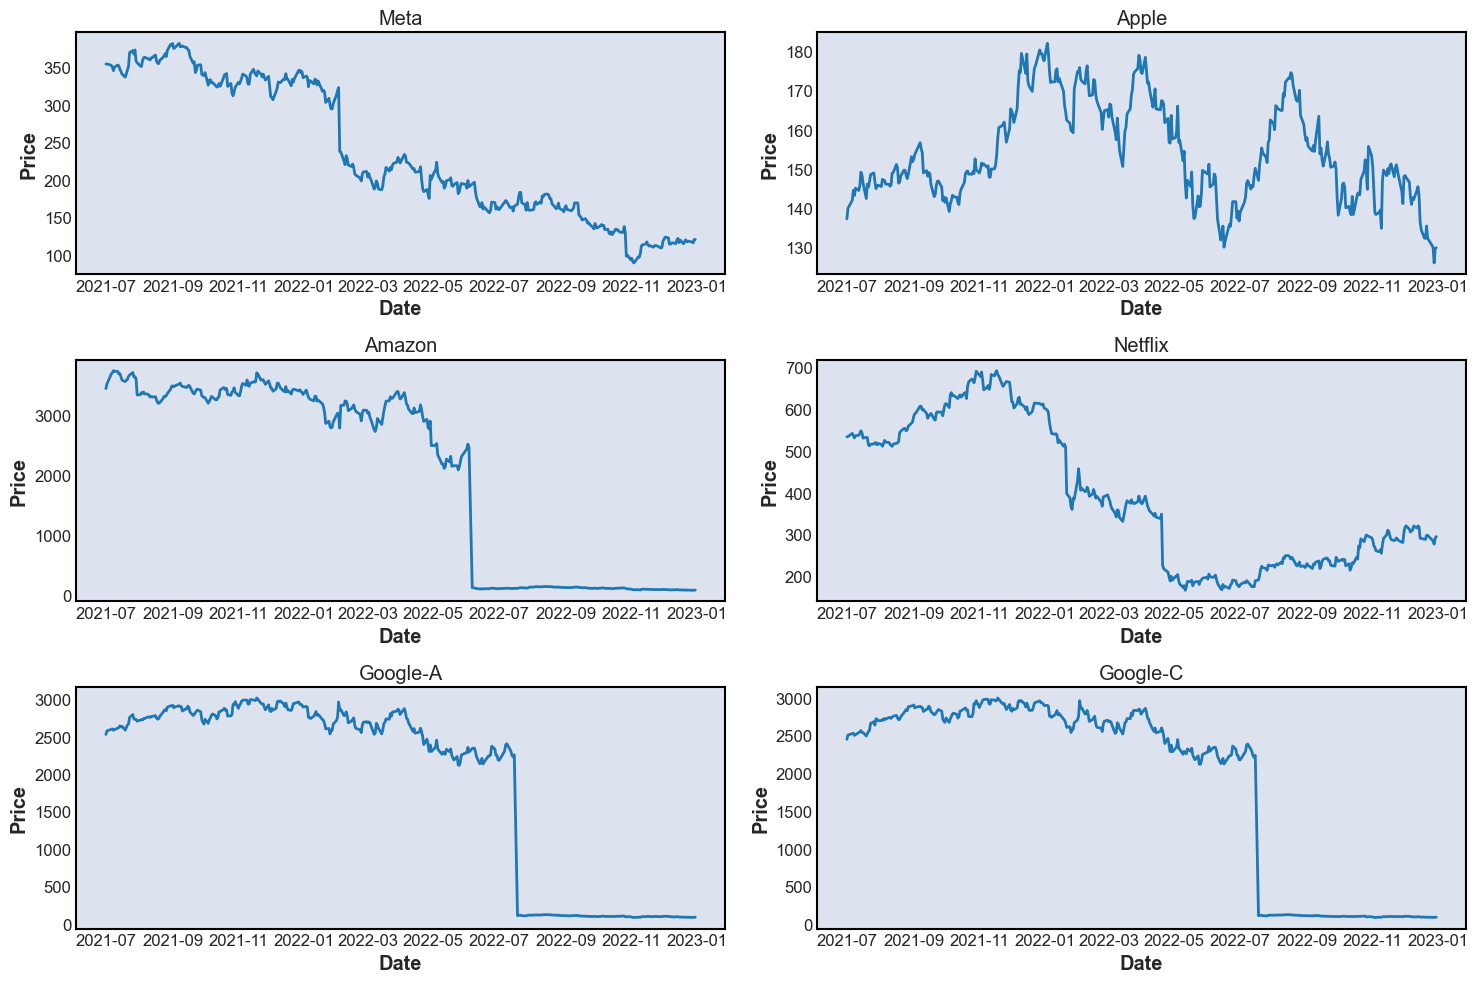

In [139]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google-A', 'Google-C']
data_frames = [meta_2021_2022_df, aapl_2021_2022_df, amzn_2021_2022_df, 
               nflx_2021_2022_df, goog_2021_2022_df, googl_2021_2022_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        ax.plot(data_frames[i][['close']] )
        ax.set_title(stocks[i])
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.grid(visible=False)
plt.tight_layout()
plt.show()

From the above charts we can see Meta and Nflx had very huge consistent drop for over a period of time.

Lets review META and NFLX percentage change per month to get an idea of how much it was dropping by month. 
We can do just for 2022 and see how they performed monthly. 

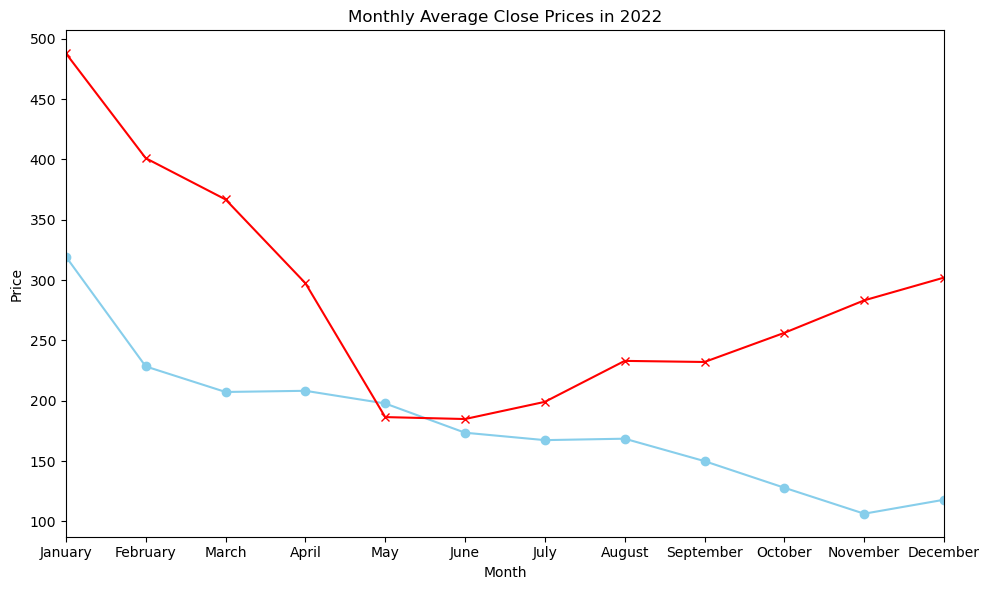

In [277]:
meta_2022_df = filter_data_by_date(meta_all_df, '2022')
nflx_2022_df = filter_data_by_date(nflx_all_df, '2022')

meta_2022_monthly_avg = meta_2022_df['close'].resample('M').mean()
nflx_2022_monthly_avg = nflx_2022_df['close'].resample('M').mean()

plt.figure(figsize=(10, 6))
meta_2022_monthly_avg.plot(marker='o', color='skyblue', linestyle='-')
nflx_2022_monthly_avg.plot(marker='x', color='red', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly Average Close Prices in 2022')
plt.xticks(meta_2022_monthly_avg.index, meta_2022_monthly_avg.index.strftime('%B'))
plt.grid(visible=False)
plt.tight_layout()
plt.show()

You can see that META dropped from around $319 to around $117, and NFLX around $480 to $190 and then finally ended year around $300. It was bad time for all stocks, so this is just an example of how bad the economy and pandemic impacted.

### Moving Average

Other analysis which helps to understand Stocks is moving average. Usually analysts use 50 day and 200 day moving average.
If the current prices is closer to moving average that means stock price is not too volatile and is consistent. 
There is alway an unexpected scenarios which can change so rapidly, hence stocks are always a risk. But moving average helps to show you how the particular stock doing in normal market conditions. 

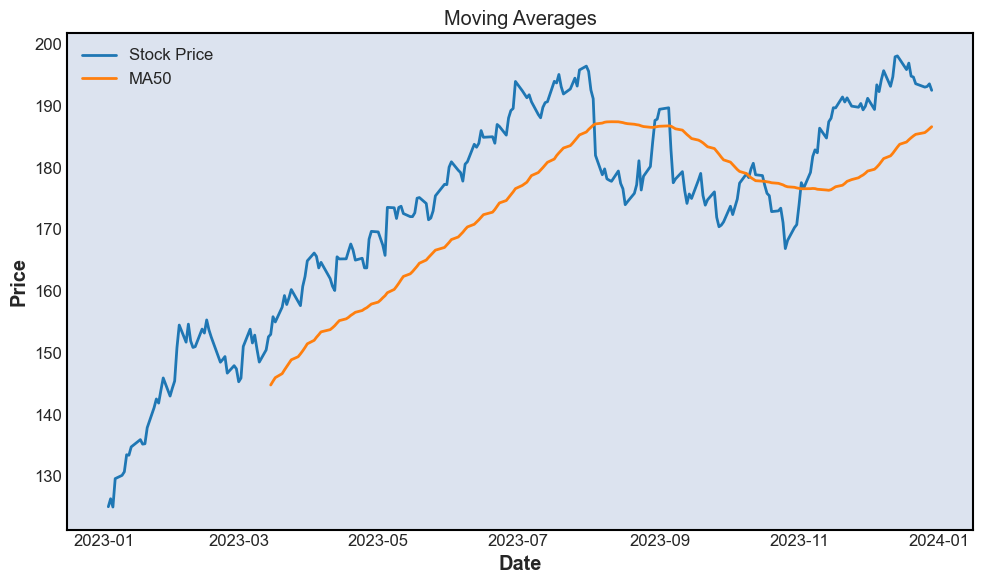

In [149]:
aapl_ma_df = aapl_all_df.loc['2023'].copy(['close'])

#calculate moving average for 50 and 200 days using rolling method
aapl_ma_df['MA50'] = aapl_ma_df['close'].rolling(window=50).mean()
aapl_ma_df['MA200'] = aapl_ma_df['close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.cla()
plt.plot(aapl_ma_df['close'], label='Stock Price')
plt.plot(aapl_ma_df['MA50'], label='MA50')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(visible=False)
plt.tight_layout()
plt.show()

Calculate moving average for all stocks so we can plot them

In [152]:
meta_ma_df = filter_data_by_date(meta_all_df, '2023')
meta_ma_df['MA50'] = meta_ma_df['close'].rolling(window=50).mean()
meta_ma_df['MA200'] = meta_ma_df['close'].rolling(window=200).mean()

aapl_ma_df = filter_data_by_date(aapl_all_df, '2023')
aapl_ma_df['MA50'] = aapl_ma_df['close'].rolling(window=50).mean()
aapl_ma_df['MA200'] = aapl_ma_df['close'].rolling(window=200).mean()

amzn_ma_df = filter_data_by_date(amzn_all_df, '2023')
amzn_ma_df['MA50'] = amzn_ma_df['close'].rolling(window=50).mean()
amzn_ma_df['MA200'] = amzn_ma_df['close'].rolling(window=200).mean()

nflx_ma_df = filter_data_by_date(nflx_all_df, '2023')
nflx_ma_df['MA50'] = nflx_ma_df['close'].rolling(window=50).mean()
nflx_ma_df['MA200'] = nflx_ma_df['close'].rolling(window=200).mean()

goog_ma_df = filter_data_by_date(goog_all_df, '2023')
goog_ma_df['MA50'] = goog_ma_df['close'].rolling(window=50).mean()
goog_ma_df['MA200'] = goog_ma_df['close'].rolling(window=200).mean()

googl_ma_df = filter_data_by_date(googl_all_df, '2023')
googl_ma_df['MA50'] = googl_ma_df['close'].rolling(window=50).mean()
googl_ma_df['MA200'] = googl_ma_df['close'].rolling(window=200).mean()

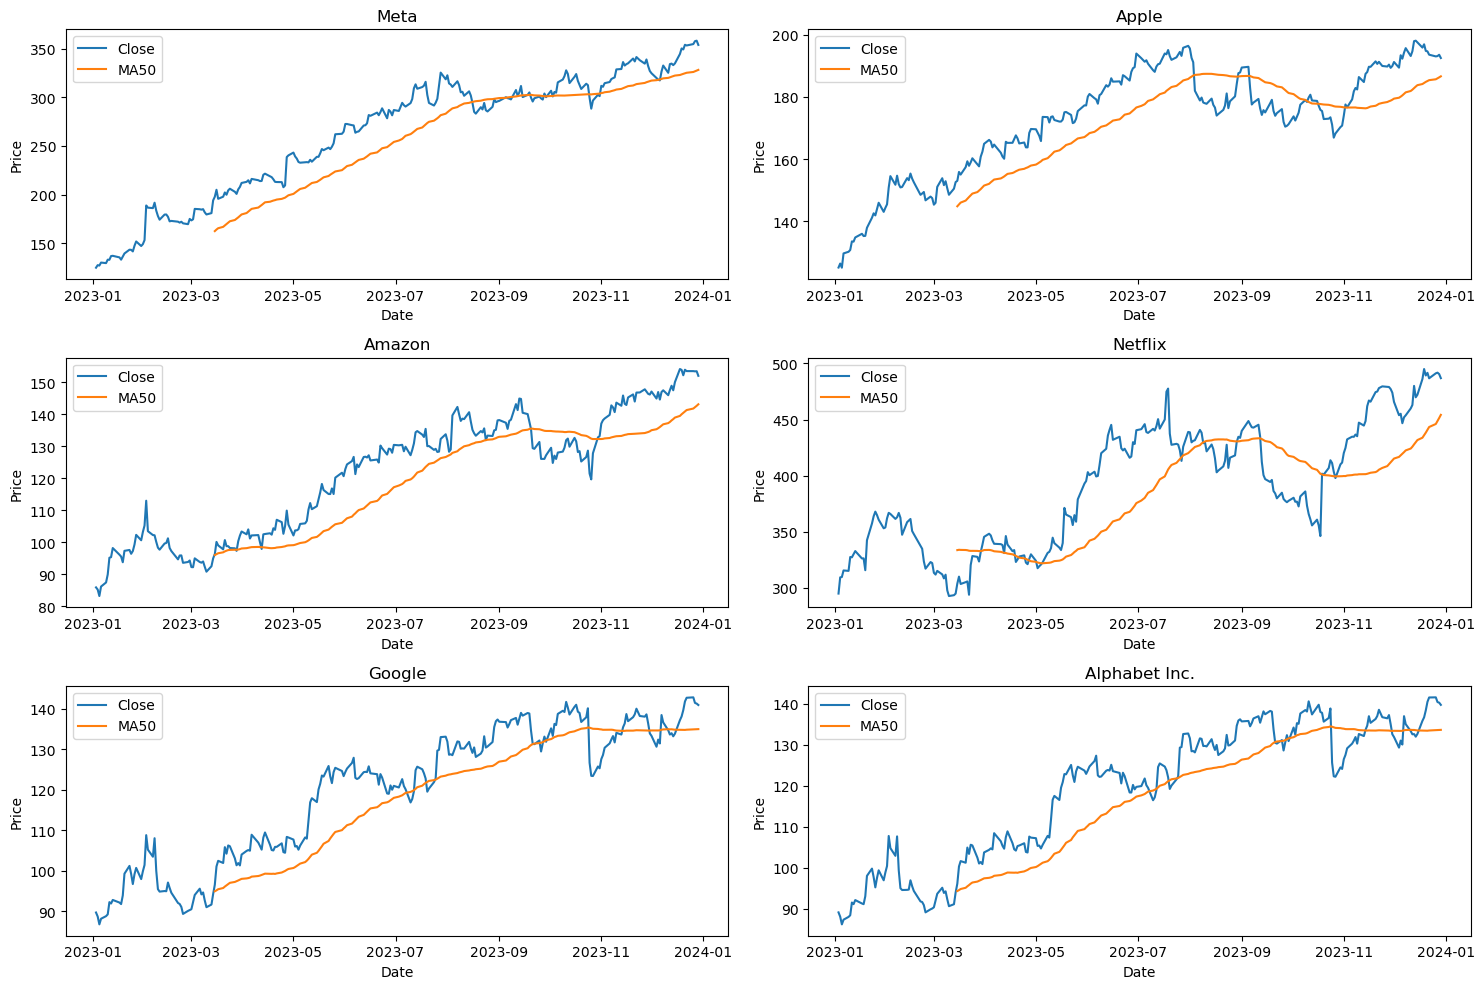

In [279]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google', 'Alphabet Inc.']
data_frames = [meta_ma_df, aapl_ma_df, amzn_ma_df, nflx_ma_df, goog_ma_df, googl_ma_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        ax.plot(data_frames[i][['close']], label='Close')
        ax.plot(data_frames[i][['MA50']], label='MA50' )
        ax.set_title(stocks[i])
        ax.grid(visible=False)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
plt.tight_layout()
plt.show()

### Statistical Analysis. 

Lets concat all closing prices to one dataframe so that we can use for analysis

In [158]:
all_stocks_df = pd.concat([meta_df['close'], aapl_df['close'], amzn_df['close'], nflx_df['close'], 
                    goog_df['close'], googl_df['close']], axis='columns', 
                   keys=['Meta', 'Apple', 'Amazon', 'Netflix', 'Google_A', 'Google_C'])

all_stocks_df.sort_index(inplace=True)
all_stocks_df.dropna(inplace=True)
all_stocks_df


,Meta,Apple,Amazon,Netflix,Google_A,Google_C
timestamp,,,,,,
2014-03-27,60.97,537.46,338.470,364.18,558.46,1114.28
2014-03-28,60.01,536.86,338.290,358.87,559.99,1120.15
2014-03-31,60.24,536.74,336.365,352.03,556.97,1114.51
2014-04-01,62.62,541.65,342.990,364.69,567.16,1134.89
2014-04-02,62.72,542.55,341.960,362.88,567.00,1135.10
...,...,...,...,...,...,...
2023-12-22,353.39,193.60,153.420,486.76,142.72,141.49
2023-12-26,354.83,193.05,153.410,491.19,142.82,141.52
2023-12-27,357.83,193.15,153.340,491.79,141.44,140.37


Lets calculate Mean, Median and Standard Deviation between these stocks. Our data is 10 yrs period. 

1. Mean determines the average price over specified timeframe.

2. Median is the center/middle value of the closing price.

3. Standard Deviation tells the variation from mean. the more distance the more volatile the stocks are. 

In [159]:
mean_prices = all_stocks_df.mean()

display("Mean Prices")
display(mean_prices)

median_prices = all_stocks_df.median()

display('Median Prices')
display(median_prices)

std_deviation = all_stocks_df.std()

display("Standard Deviattion")
display(std_deviation)

'Mean Prices'

Meta         180.833242
Apple        171.351525
Amazon      1358.513013
Netflix      330.831885
Google_A    1075.809629
Google_C    1081.092677
dtype: float64

'Median Prices'

Meta        171.585
Apple       151.795
Amazon      975.915
Netflix     341.245
Google_A    951.975
Google_C    974.470
dtype: float64

'Standard Deviattion'

Meta          80.158829
Apple         84.460942
Amazon      1110.402339
Netflix      152.621457
Google_A     750.023124
Google_C     741.228045
dtype: float64

### Statistical Data Visually

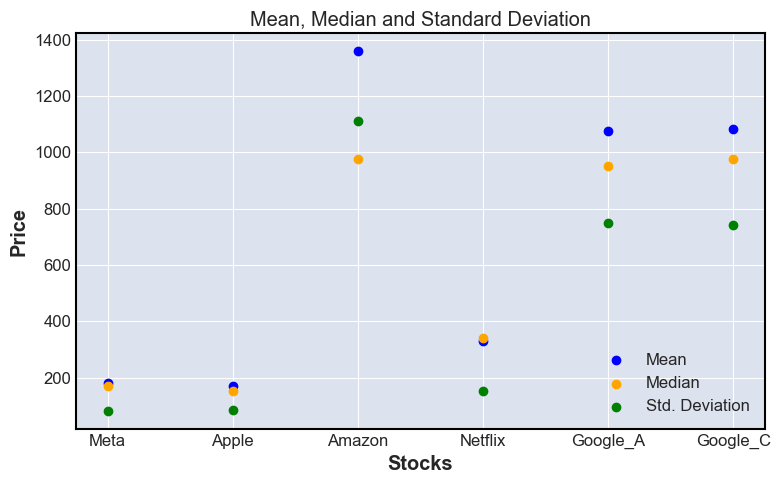

In [172]:
plt.figure(figsize=(8, 5))
plt.scatter(mean_prices.index, mean_prices.values, color='blue', label='Mean')
plt.scatter(median_prices.index, median_prices.values, color='orange', label='Median')
plt.scatter(std_deviation.index, std_deviation.values, color='green', label='Std. Deviation')
plt.xlabel('Stocks')
plt.ylabel('Price')
plt.title('Mean, Median and Standard Deviation')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Correlation

Even though all our stocks are tech companies, they vary a lot. Correlation helps to understand how are each stock influence other or if there is any relation at all. 

In [169]:
corr_data = all_stocks_df.corr()
corr_data

,Meta,Apple,Amazon,Netflix,Google_A,Google_C
Meta,1.000000,0.083234,0.645310,0.536765,0.567968,0.558016
Apple,0.083234,1.000000,0.145180,0.184539,0.041869,0.047135
Amazon,0.645310,0.145180,1.000000,0.490007,0.896459,0.893846
Netflix,0.536765,0.184539,0.490007,1.000000,0.387096,0.379524
Google_A,0.567968,0.041869,0.896459,0.387096,1.000000,0.999253
Google_C,0.558016,0.047135,0.893846,0.379524,0.999253,1.000000


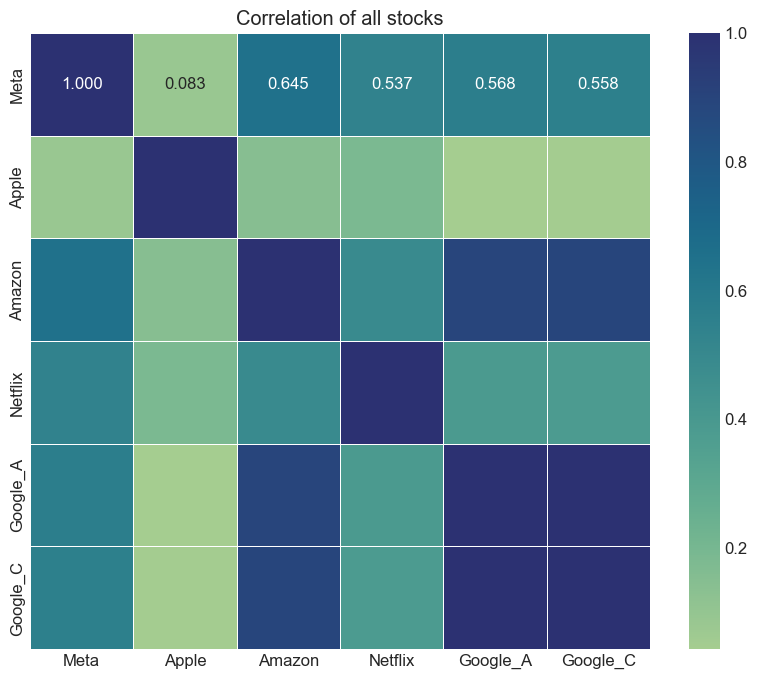

In [170]:
# Visualizing Correlation
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_data, annot=True, linewidth=.5, fmt='.3f', cmap='crest')
ax.set(xlabel="", ylabel="")
ax.set_title('Correlation of all stocks')
ax.xaxis.tick_bottom()
plt.show()

Observations:

Since all are of tech companies they don’t have any -ve correlation. 

Most of them have very good positive correlation. Except for Aapl which has least correlation with others. 

Meta has consistent correlation with all other stocks. 

Amazon has a very high correlation with Google stocks. 

### Candlestick Chart

It is best way to visualize Open, Close, High, Low prices of a stock. Which helps to understand how it performed on particular day/period. 

Lets take one stock and visualize and understand the chart. 

In [273]:
# filter aapl stock just for 1 months so we can see candlestick chart more 
# enhanced visually
aapl_c_df = filter_data_by_date(aapl_all_df, '2023-12')
aapl_c_df.drop('volume', axis=1, inplace=True)
aapl_c_df.reset_index(inplace=True)

# Convert the 'Date' column to Matplotlib's date format
aapl_c_df['timestamp'] = pd.to_datetime(aapl_c_df['timestamp'])
aapl_c_df['timestamp'] = aapl_c_df['timestamp'].apply(mdates.date2num)

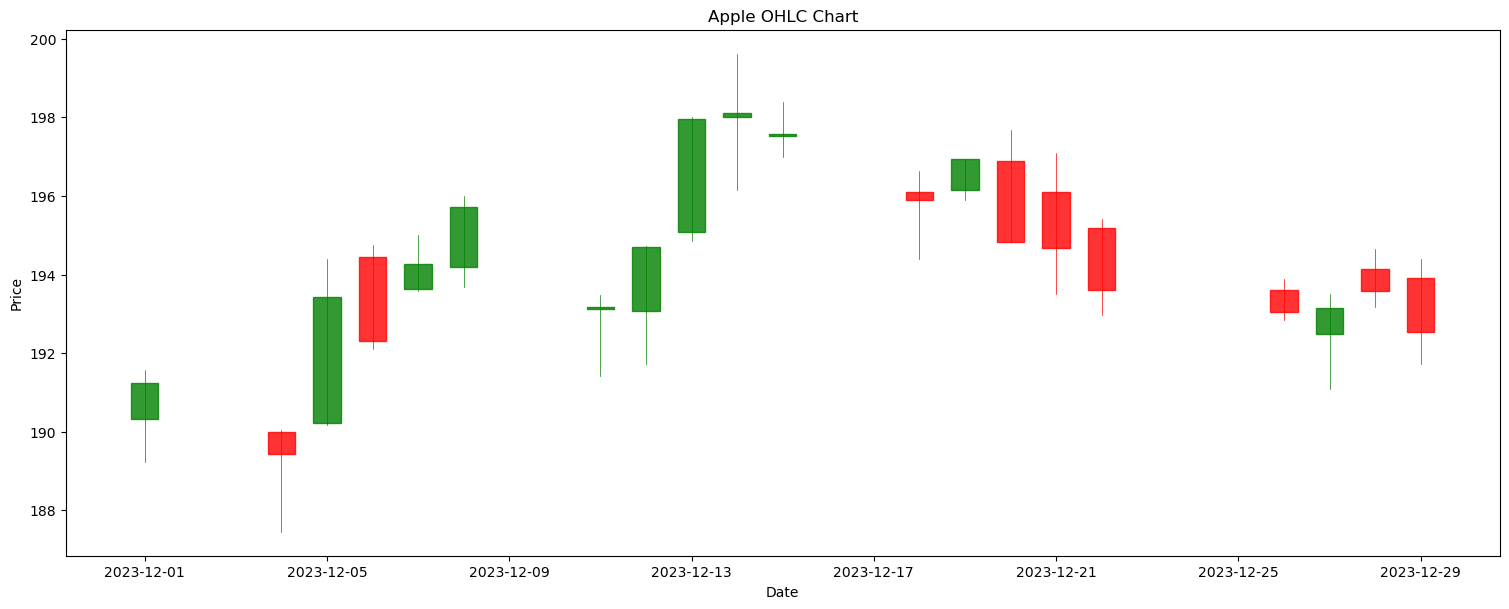

In [274]:
# Plotting candlestick chart
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 6))
candlestick_ohlc(ax, aapl_c_df.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
ax.set_title('Apple OHLC Chart')
ax.xaxis_date()

fig.tight_layout()

plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Each item in the above chart which is called candlestick represents Opening, High, Low and Close price for that particular day. Hence name OHLC chart. 

Green color represents that the price closed more than open which is a gain and Red is viceversa which is a loss.
If it is gain, Open price is bottom of wide bar, and Close price is top of wide bar and if loss it is viceversa. 
Thin lines represents Higehst and Lowest price for that particular period.

In [234]:
from datetime import datetime,timedelta

aapl_qrt_series = aapl_df['close'].resample('Q').mean()
aapl_qrt_series.index += timedelta(days=1)
aapl_qrt_df = pd.DataFrame(aapl_qrt_series)
aapl_qrt_df.columns = ['aapl']
aapl_qrt_df

,aapl
timestamp,
2014-04-01,532.604566
2014-07-01,455.642721
2014-10-01,98.163311
2015-01-01,108.821016
2015-04-01,120.776721
2015-07-01,127.937937
2015-10-01,117.297969
2016-01-01,114.299297
2016-04-01,99.655082


In [233]:
federal_df = pd.read_csv("../Datasets/IRSTFR01USQ156N.csv")
federal_df.set_index('DATE', inplace=True)
federal_df.index = pd.to_datetime(federal_df.index)
federal_df


,IRSTFR01USQ156N
DATE,
2014-01-01,0.08
2014-04-01,0.10
2014-07-01,0.09
2014-10-01,0.12
2015-01-01,0.11
2015-04-01,0.13
2015-07-01,0.14
2015-10-01,0.24
2016-01-01,0.36


<Axes: xlabel='timestamp'>

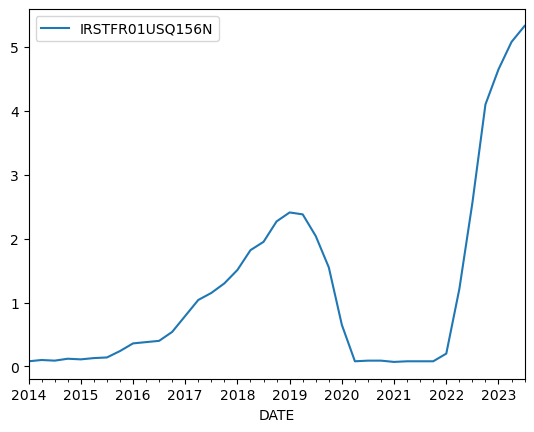

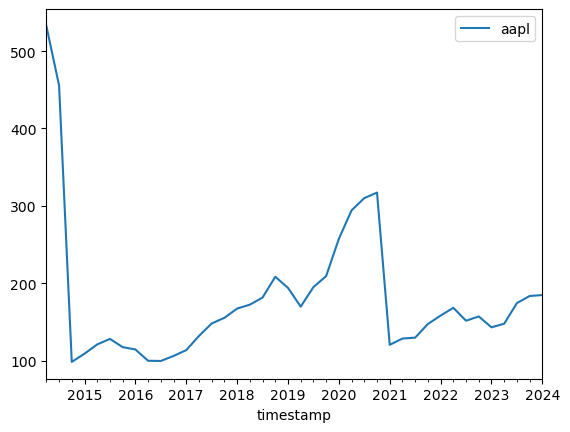

In [276]:
federal_df.plot()
aapl_qrt_df.plot()

In [239]:
aapl_qrt_df.shape
federal_df.shape

ir_stock_df = pd.concat([federal_df, aapl_qrt_df], axis=1)
ir_stock_df.dropna(inplace=True)
ir_stock_df

,IRSTFR01USQ156N,aapl
2014-04-01,0.10,532.604566
2014-07-01,0.09,455.642721
2014-10-01,0.12,98.163311
2015-01-01,0.11,108.821016
2015-04-01,0.13,120.776721
2015-07-01,0.14,127.937937
2015-10-01,0.24,117.297969
2016-01-01,0.36,114.299297
2016-04-01,0.38,99.655082
2016-07-01,0.40,99.401250


In [250]:
a1 = pd.DataFrame(ir_stock_df['IRSTFR01USQ156N'].loc['2021':'2023'])
a2 = pd.DataFrame(ir_stock_df['aapl'].loc['2021':'2023'])

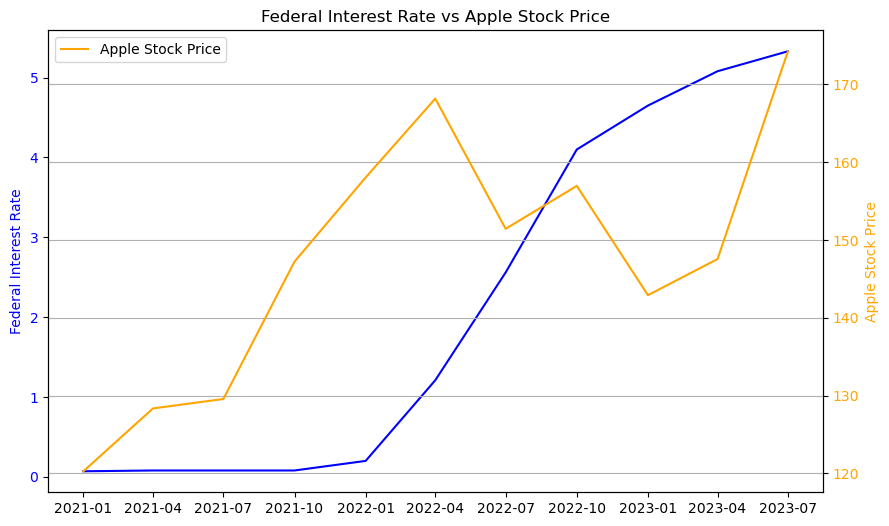

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'interest_rate_df' contains Federal Interest Rate data and 'aapl_stock_df' contains Apple stock data, both quarterly

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Federal Interest Rate on the first y-axis (left)
ax1.plot(a1.index, a1['IRSTFR01USQ156N'], color='blue', label='Federal Interest Rate')
ax1.set_ylabel('Federal Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis (right) for Apple's Stock Price
ax2 = ax1.twinx()
ax2.plot(a2.index, a2['aapl'], color='orange', label='Apple Stock Price')
ax2.set_ylabel('Apple Stock Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.xlabel('Quarter')
plt.title('Federal Interest Rate vs Apple Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [266]:
effr_df = pd.read_csv("../Datasets/EFFR.csv")
effr_df = effr_df[effr_df['EFFR'] != '.']
effr_df.set_index('DATE', inplace=True)
effr_df.index = pd.to_datetime(effr_df.index)
effr_df['EFFR'] = effr_df['EFFR'].astype('Float64')
effr_df



,EFFR
DATE,
2014-01-02,0.08
2014-01-03,0.08
2014-01-06,0.08
2014-01-07,0.07
2014-01-08,0.07
...,...
2023-12-28,5.33
2023-12-29,5.33
2024-01-02,5.33


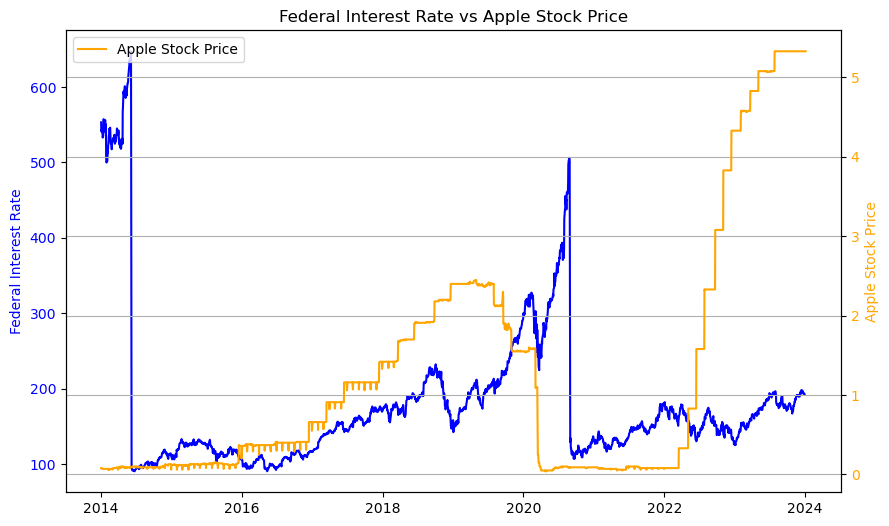

In [269]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Federal Interest Rate on the first y-axis (left)
ax1.plot(aapl_df.index, aapl_df['close'], color='blue', label='Federal Interest Rate')
ax1.set_ylabel('Federal Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis (right) for Apple's Stock Price
ax2 = ax1.twinx()
ax2.plot(effr_df.index, effr_df['EFFR'], color='orange', label='Apple Stock Price')
ax2.set_ylabel('Apple Stock Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.xlabel('Quarter')
plt.title('Federal Interest Rate vs Apple Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# copy close column
aapl_ds_y_df = aapl_all_df.copy()
aapl_ds_y_df.drop(['open','high','low','volume'],axis=1, inplace=True)
aapl_ds_y_df.reset_index(inplace=True)
aapl_ds_y_df.rename(columns={'timestamp':'ds', 'close':'y'}, inplace=True)
aapl_ds_y_df


,ds,y
0,1999-11-01,77.62
1,1999-11-02,80.25
2,1999-11-03,81.50
3,1999-11-04,83.62
4,1999-11-05,88.31
...,...,...
6075,2023-12-22,193.60
6076,2023-12-26,193.05
6077,2023-12-27,193.15
6078,2023-12-28,193.58


In [16]:
aapl_model = Prophet()

aapl_model.fit(aapl_ds_y_df)

future = aapl_model.make_future_dataframe(periods=30)  # Predicting next 30 days


forecast = aapl_model.predict(future)
forecast.iloc[-30:]

18:40:42 - cmdstanpy - INFO - Chain [1] start processing
18:40:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6080,2023-12-30,144.465069,57.776135,196.391778,144.465069,144.465069,-14.025131,-14.025131,-14.025131,-11.679466,-11.679466,-11.679466,-2.345665,-2.345665,-2.345665,0.0,0.0,0.0,130.439938
6081,2023-12-31,144.424886,67.242719,198.249768,144.424886,144.424886,-13.752725,-13.752725,-13.752725,-11.679474,-11.679474,-11.679474,-2.073251,-2.073251,-2.073251,0.0,0.0,0.0,130.672162
6082,2024-01-01,144.384703,82.395619,222.700298,144.384703,144.384703,2.858383,2.858383,2.858383,4.655523,4.655523,4.655523,-1.797140,-1.797140,-1.797140,0.0,0.0,0.0,147.243086
6083,2024-01-02,144.344520,79.685093,211.625659,144.344520,144.344520,3.099924,3.099924,3.099924,4.627380,4.627380,4.627380,-1.527456,-1.527456,-1.527456,0.0,0.0,0.0,147.444444
6084,2024-01-03,144.304337,79.735707,219.069450,144.304337,144.304337,3.157693,3.157693,3.157693,4.431925,4.431925,4.431925,-1.274232,-1.274232,-1.274232,0.0,0.0,0.0,147.462030
6085,2024-01-04,144.264155,78.713162,215.878852,144.264155,144.264155,4.013788,4.013788,4.013788,5.060877,5.060877,5.060877,-1.047089,-1.047089,-1.047089,0.0,0.0,0.0,148.277943
6086,2024-01-05,144.223972,79.887388,216.333607,144.223972,144.223972,3.728300,3.728300,3.728300,4.583235,4.583235,4.583235,-0.854935,-0.854935,-0.854935,0.0,0.0,0.0,147.952272
6087,2024-01-06,144.183789,59.402252,200.235343,144.183789,144.183789,-12.385141,-12.385141,-12.385141,-11.679466,-11.679466,-11.679466,-0.705675,-0.705675,-0.705675,0.0,0.0,0.0,131.798648
6088,2024-01-07,144.143606,65.355065,199.560182,144.143606,144.143606,-12.285427,-12.285427,-12.285427,-11.679474,-11.679474,-11.679474,-0.605953,-0.605953,-0.605953,0.0,0.0,0.0,131.858179
6089,2024-01-08,144.103423,78.236649,215.996105,144.103423,144.103423,4.094591,4.094591,4.094591,4.655523,4.655523,4.655523,-0.560932,-0.560932,-0.560932,0.0,0.0,0.0,148.198014


In [17]:
future_no_weekends = future[future['ds'].dt.dayofweek < 5]  # Keeping only weekdays (Monday to Friday)
forecast_nw = aapl_model.predict(future_no_weekends)
forecast_nw.iloc[-30:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6070,2023-12-15,145.067813,79.381739,211.661918,145.067813,145.067813,2.686076,2.686076,2.686076,4.583235,4.583235,4.583235,-1.897159,-1.897159,-1.897159,0.0,0.0,0.0,147.753889
6071,2023-12-18,144.947264,78.343256,220.757490,144.947264,144.947264,1.910759,1.910759,1.910759,4.655523,4.655523,4.655523,-2.744764,-2.744764,-2.744764,0.0,0.0,0.0,146.858023
6072,2023-12-19,144.907081,74.948501,214.982964,144.907081,144.907081,1.656116,1.656116,1.656116,4.627380,4.627380,4.627380,-2.971264,-2.971264,-2.971264,0.0,0.0,0.0,146.563198
6073,2023-12-20,144.866898,77.183611,214.300044,144.866898,144.866898,1.275005,1.275005,1.275005,4.431925,4.431925,4.431925,-3.156919,-3.156919,-3.156919,0.0,0.0,0.0,146.141904
6074,2023-12-21,144.826715,77.641574,216.492615,144.826715,144.826715,1.764851,1.764851,1.764851,5.060877,5.060877,5.060877,-3.296027,-3.296027,-3.296027,0.0,0.0,0.0,146.591566
6075,2023-12-22,144.786532,75.793438,219.296556,144.786532,144.786532,1.198764,1.198764,1.198764,4.583235,4.583235,4.583235,-3.384471,-3.384471,-3.384471,0.0,0.0,0.0,145.985297
6076,2023-12-26,144.625801,80.219831,210.426415,144.625801,144.625801,1.417162,1.417162,1.417162,4.627380,4.627380,4.627380,-3.210218,-3.210218,-3.210218,0.0,0.0,0.0,146.042963
6077,2023-12-27,144.585618,81.775972,213.886989,144.585618,144.585618,1.387180,1.387180,1.387180,4.431925,4.431925,4.431925,-3.044744,-3.044744,-3.044744,0.0,0.0,0.0,145.972798
6078,2023-12-28,144.545435,82.599030,214.312455,144.545435,144.545435,2.220522,2.220522,2.220522,5.060877,5.060877,5.060877,-2.840356,-2.840356,-2.840356,0.0,0.0,0.0,146.765957
6079,2023-12-29,144.505252,85.867538,214.790028,144.505252,144.505252,1.978749,1.978749,1.978749,4.583235,4.583235,4.583235,-2.604486,-2.604486,-2.604486,0.0,0.0,0.0,146.484001


In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Extracting 'Close' price column
#aapl_arima_df = filter_data_by_date(aapl_all_df, '2023')
aapl_arima_df = aapl_all_df.copy()
aapl_arima_df.index = pd.to_datetime(aapl_arima_df.index, format='%Y-%m-%d')  # Change the format if necessary
aapl_arima_df = aapl_arima_df.asfreq('D')  # Set the frequency to 'D' (daily) or the appropriate frequency


close_price = aapl_arima_df['close']

# Fitting ARIMA model
# ARIMA model parameters: p = 5 (autoregression lag), d = 1 (order of differencing), q = 0 (moving average window)
model = ARIMA(close_price, order=(5, 1, 0))
fitted_model = model.fit()

# Forecasting next 30 days
forecast = fitted_model.forecast(steps=30)
forecast

2023-12-30    192.171330
2023-12-31    191.959350
2024-01-01    192.098438
2024-01-02    192.029043
2024-01-03    192.060777
2024-01-04    192.039800
2024-01-05    192.076854
2024-01-06    192.065666
2024-01-07    192.075098
2024-01-08    192.067089
2024-01-09    192.072804
2024-01-10    192.069151
2024-01-11    192.071373
2024-01-12    192.069410
2024-01-13    192.070678
2024-01-14    192.069835
2024-01-15    192.070437
2024-01-16    192.070004
2024-01-17    192.070307
2024-01-18    192.070105
2024-01-19    192.070251
2024-01-20    192.070148
2024-01-21    192.070219
2024-01-22    192.070170
2024-01-23    192.070204
2024-01-24    192.070180
2024-01-25    192.070197
2024-01-26    192.070185
2024-01-27    192.070193
2024-01-28    192.070188
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:

# Plotting actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.cla()
plt.plot(close_price, label='Actual Stock Price')
plt.plot(forecast, color='red', linestyle='--', label='Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Model for Stock Price Prediction (AAPL)')
plt.legend()
plt.grid()
plt.show()


In [ ]:

#forecast.set_index('ds', inplace=True)
#forecast[['yhat', 'yhat_lower', 'yhat_upper']].loc['2023':].plot()

# Plot the forecast
aapl_model.plot(forecast)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast')
plt.show()

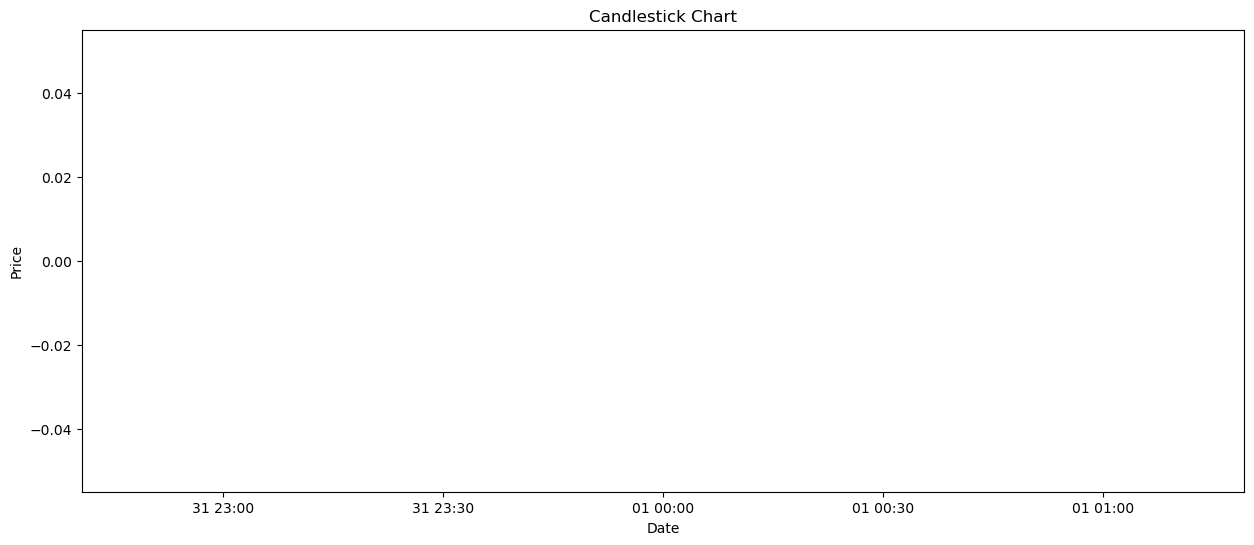

In [189]:
aapl_c_df = aapl_df.loc['2022-06':'2023-12'].copy(['Open', 'High', 'Low', 'Close'])
aapl_c_df.reset_index(inplace=True)
aapl_c_df

# Convert the 'Date' column to Matplotlib's date format
aapl_c_df['timestamp'] = pd.to_datetime(aapl_c_df['timestamp'])
aapl_c_df['timestamp'] = aapl_c_df['timestamp'].apply(mdates.date2num)

# Plotting candlestick chart
fig, ax = plt.subplots(figsize=(15, 6))
candlestick_ohlc(ax, aapl_c_df[['timestamp', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')
ax.set_title('Candlestick Chart')
ax.xaxis_date()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

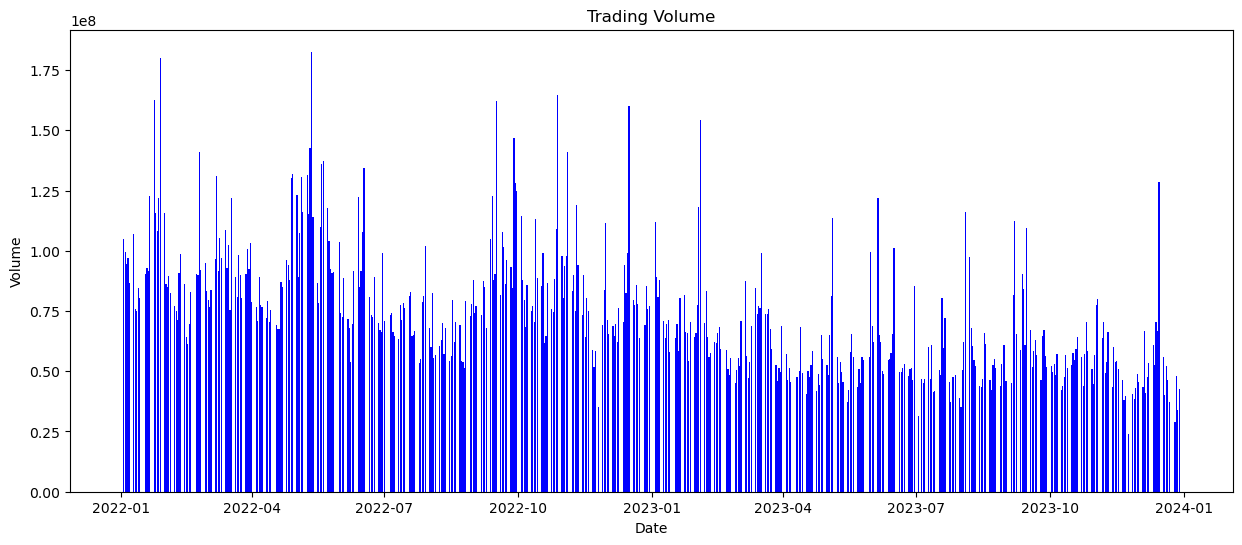

In [114]:
plt.figure(figsize=(15, 6))
plt.bar(aapl_ma_df['timestamp'], aapl_ma_df['volume'], color='blue')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [133]:
meta_earnings_df = pd.read_csv("../Datasets/META_quarterly_earnings.csv")
meta_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#meta_earnings_df

aapl_earnings_df = pd.read_csv("../Datasets/AAPL_quarterly_earnings.csv")
aapl_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(aapl_earnings_df)

amzn_earnings_df = pd.read_csv("../Datasets/AMZN_quarterly_earnings.csv")
amzn_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(amzn_earnings_df)

nflx_earnings_df = pd.read_csv("../Datasets/NFLX_quarterly_earnings.csv")
nflx_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(nflx_earnings_df)

goog_earnings_df = pd.read_csv("../Datasets/GOOG_quarterly_earnings.csv")
goog_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(goog_earnings_df)

googl_earnings_df = pd.read_csv("../Datasets/GOOGL_quarterly_earnings.csv")
googl_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(googl_earnings_df)


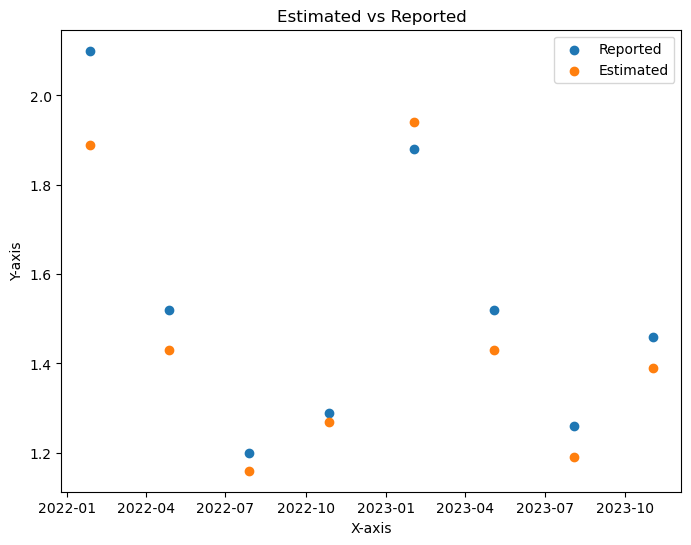

In [144]:
aapl_earnings_df['reportedDate'] = pd.to_datetime(aapl_earnings_df['reportedDate'])

x = aapl_earnings_df['reportedDate'].loc[aapl_earnings_df['reportedDate'].dt.year > 2021]
y1 = aapl_earnings_df['reportedEPS'].loc[aapl_earnings_df['reportedDate'].dt.year > 2021]
y2 = aapl_earnings_df['estimatedEPS'].loc[aapl_earnings_df['reportedDate'].dt.year > 2021]

# Creating the scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(x, y1, label='Reported')
plt.scatter(x, y2, label='Estimated')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Estimated vs Reported')
plt.legend()

plt.show()

In [101]:
aapl_df['Stock Volatility'] = aapl_df['close'].pct_change(periods=12)
aapl_df

,open,high,low,close,volume,Stock Volatility
timestamp,,,,,,
1999-11-01,80.00,80.69,77.370,77.62,2487300,NaN
1999-11-02,78.00,81.69,77.310,80.25,3564600,0.033883
1999-11-03,81.62,83.25,81.000,81.50,2932700,0.015576
1999-11-04,82.06,85.37,80.620,83.62,3384700,0.026012
1999-11-05,84.62,88.37,84.000,88.31,3721500,0.056087
...,...,...,...,...,...,...
2023-12-22,195.18,195.41,192.970,193.60,37149570,-0.005548
2023-12-26,193.61,193.89,192.830,193.05,28919310,-0.002841
2023-12-27,192.49,193.50,191.090,193.15,47899806,0.000518


In [105]:
print(aapl_df['close'].loc['2023-12-29'] * aapl_df['volume'].sum())

print( aapl_df['volume'].sum())

37735794890765.79
195999557943


In [ ]:
import Prophet
m = Prophet()

m.fit()